#### 1. Merging Train and Test Datasets

In [22]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Set random seed
np.random.seed(42)

# Configure plotting
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
%matplotlib inline

print("Libraries imported")

Libraries imported


In [4]:
# Load training data
train_data = pd.read_csv('../Data/breast_cancer_trainset.csv')
train_data['dataset'] = 'train'

print(f"Training data shape: {train_data.shape}")
train_data.head()

Training data shape: (455, 32)


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis,dataset
0,10.65,25.22,68.01,347.0,0.09657,0.07234,0.02379,0.01615,0.1897,0.06329,...,77.98,455.7,0.1499,0.1398,0.1125,0.06136,0.3409,0.08147,0,train
1,12.34,26.86,81.15,477.4,0.10340,0.13530,0.10850,0.04562,0.1943,0.06937,...,101.70,768.9,0.1785,0.4706,0.4425,0.14590,0.3215,0.12050,1,train
2,14.25,22.15,96.42,645.7,0.10490,0.20080,0.21350,0.08653,0.1949,0.07292,...,119.10,959.5,0.1640,0.6247,0.6922,0.17850,0.2844,0.11320,1,train
3,19.40,23.50,129.10,1155.0,0.10270,0.15580,0.20490,0.08886,0.1978,0.06000,...,144.90,1417.0,0.1463,0.2968,0.3458,0.15640,0.2920,0.07614,1,train
4,16.27,20.71,106.90,813.7,0.11690,0.13190,0.14780,0.08488,0.1948,0.06277,...,129.80,1121.0,0.1590,0.2947,0.3597,0.15830,0.3103,0.08200,1,train


In [5]:
# Load testing data (if available)
try:
    test_data = pd.read_csv('../Data/breast_cancer_testset.csv')
    test_data['dataset'] = 'test'
    print(f"Testing data shape: {test_data.shape}")
    
    # Merge datasets
    data = pd.concat([train_data, test_data], axis=0, ignore_index=True)
    print(f"\nMerged data shape: {data.shape}")
except FileNotFoundError:
    print("Test data not found, using training data only")
    data = train_data

print(f"\nTotal samples: {len(data):,}")

Testing data shape: (114, 32)

Merged data shape: (569, 32)

Total samples: 569


#### 2. Overview

In [6]:
# Display basic information
print("Dataset Info:")
data.info()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   radius_mean              569 non-null    float64
 1   texture_mean             569 non-null    float64
 2   perimeter_mean           569 non-null    float64
 3   area_mean                569 non-null    float64
 4   smoothness_mean          569 non-null    float64
 5   compactness_mean         569 non-null    float64
 6   concavity_mean           569 non-null    float64
 7   concave points_mean      569 non-null    float64
 8   symmetry_mean            569 non-null    float64
 9   fractal_dimension_mean   569 non-null    float64
 10  radius_se                569 non-null    float64
 11  texture_se               569 non-null    float64
 12  perimeter_se             569 non-null    float64
 13  area_se                  569 non-null    float64
 14  smoothness_s

In [7]:
# Statistical summary
data.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.372583
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,0.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [8]:
# Check data shape
print(f"Number of rows: {data.shape[0]:,}")
print(f"Number of columns: {data.shape[1]}")
print(f"\nColumn names:")
print(data.columns.tolist())

Number of rows: 569
Number of columns: 32

Column names:
['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst', 'diagnosis', 'dataset']


#### 3. Missing Values Analysis

In [11]:
# Check for missing values
missing = data.isnull().sum()
missing_percent = (missing / len(data)) * 100

missing_df = pd.DataFrame({
    'Missing_Count': missing,
    'Missing_Percent': missing_percent
})

missing_df = missing_df[missing_df['Missing_Count'] > 0].sort_values('Missing_Count', ascending=False)

if len(missing_df) > 0:
    print("Columns with missing values:")
    print(missing_df)
    
    # Visualize
    plt.figure(figsize=(10, 6))
    plt.barh(missing_df.index, missing_df['Missing_Percent'], color='coral')
    plt.xlabel('Missing Percentage (%)')
    plt.title('Missing Values by Column')
    plt.tight_layout()
    plt.show()
else:
    print("No missing values found")

No missing values found


#### 4. Target Variable Distribution

In [12]:
# Identify target column
if 'diagnosis' in data.columns:
    target_col = 'diagnosis'
elif 'target' in data.columns:
    target_col = 'target'
else:
    target_col = data.columns[-1]

print(f"Target column: {target_col}")
print(f"\nTarget distribution:")
print(data[target_col].value_counts())
print(f"\nTarget percentages:")
print(data[target_col].value_counts(normalize=True) * 100)

Target column: diagnosis

Target distribution:
diagnosis
0    357
1    212
Name: count, dtype: int64

Target percentages:
diagnosis
0    62.741652
1    37.258348
Name: proportion, dtype: float64


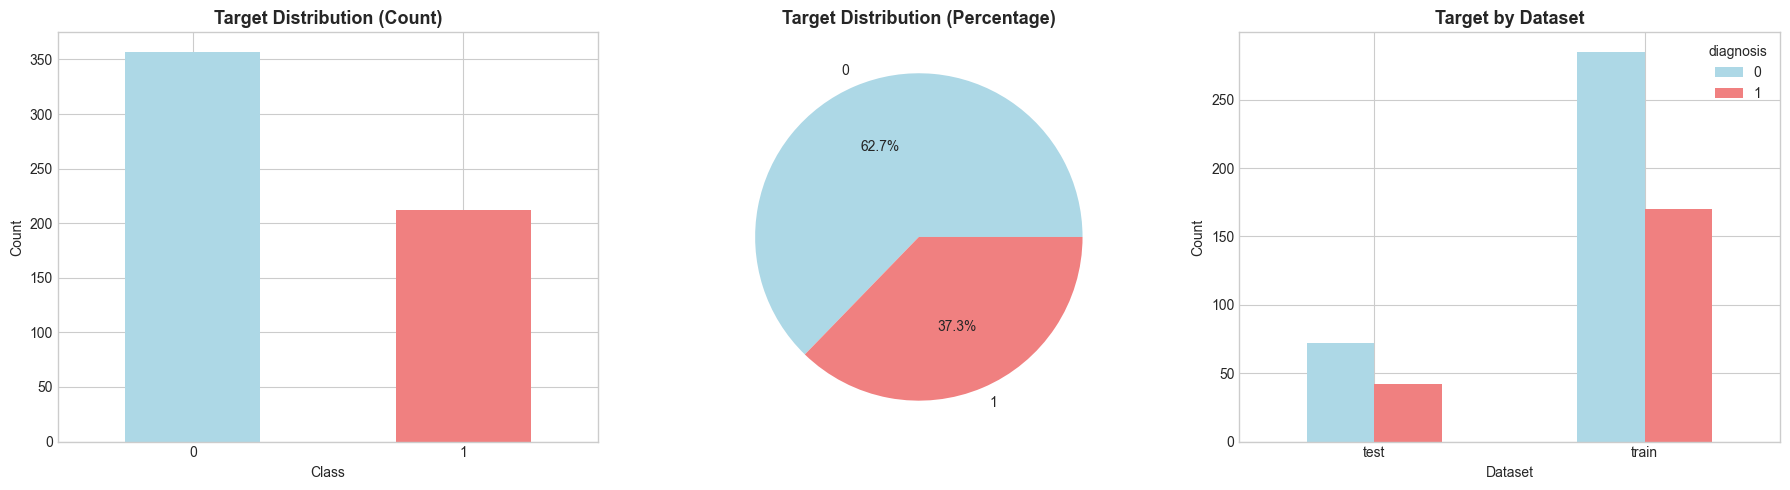

In [13]:
# Visualize target distribution
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Count plot
data[target_col].value_counts().plot(kind='bar', ax=axes[0], color=['lightblue', 'lightcoral'])
axes[0].set_title('Target Distribution (Count)', fontsize=13, fontweight='bold')
axes[0].set_xlabel('Class')
axes[0].set_ylabel('Count')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=0)

# Pie chart
data[target_col].value_counts().plot(kind='pie', ax=axes[1], autopct='%1.1f%%',
                                     colors=['lightblue', 'lightcoral'])
axes[1].set_title('Target Distribution (Percentage)', fontsize=13, fontweight='bold')
axes[1].set_ylabel('')

# Distribution by dataset (if merged)
if 'dataset' in data.columns:
    pd.crosstab(data['dataset'], data[target_col]).plot(kind='bar', ax=axes[2], 
                                                          color=['lightblue', 'lightcoral'])
    axes[2].set_title('Target by Dataset', fontsize=13, fontweight='bold')
    axes[2].set_xlabel('Dataset')
    axes[2].set_ylabel('Count')
    axes[2].set_xticklabels(axes[2].get_xticklabels(), rotation=0)
    axes[2].legend(title=target_col)
else:
    axes[2].axis('off')

plt.tight_layout()
plt.show()

#### 4. Feature Identification

In [14]:
# Identify feature columns
id_cols = ['id', 'Id', 'ID', 'Unnamed: 0', 'dataset']
feature_cols = [col for col in data.columns if col not in [target_col] + id_cols]

print(f"Number of features: {len(feature_cols)}")
print(f"\nFeature columns:")
for i, col in enumerate(feature_cols, 1):
    print(f"{i:2d}. {col}")

Number of features: 30

Feature columns:
 1. radius_mean
 2. texture_mean
 3. perimeter_mean
 4. area_mean
 5. smoothness_mean
 6. compactness_mean
 7. concavity_mean
 8. concave points_mean
 9. symmetry_mean
10. fractal_dimension_mean
11. radius_se
12. texture_se
13. perimeter_se
14. area_se
15. smoothness_se
16. compactness_se
17. concavity_se
18. concave points_se
19. symmetry_se
20. fractal_dimension_se
21. radius_worst
22. texture_worst
23. perimeter_worst
24. area_worst
25. smoothness_worst
26. compactness_worst
27. concavity_worst
28. concave points_worst
29. symmetry_worst
30. fractal_dimension_worst


#### 5. Feature Distribution

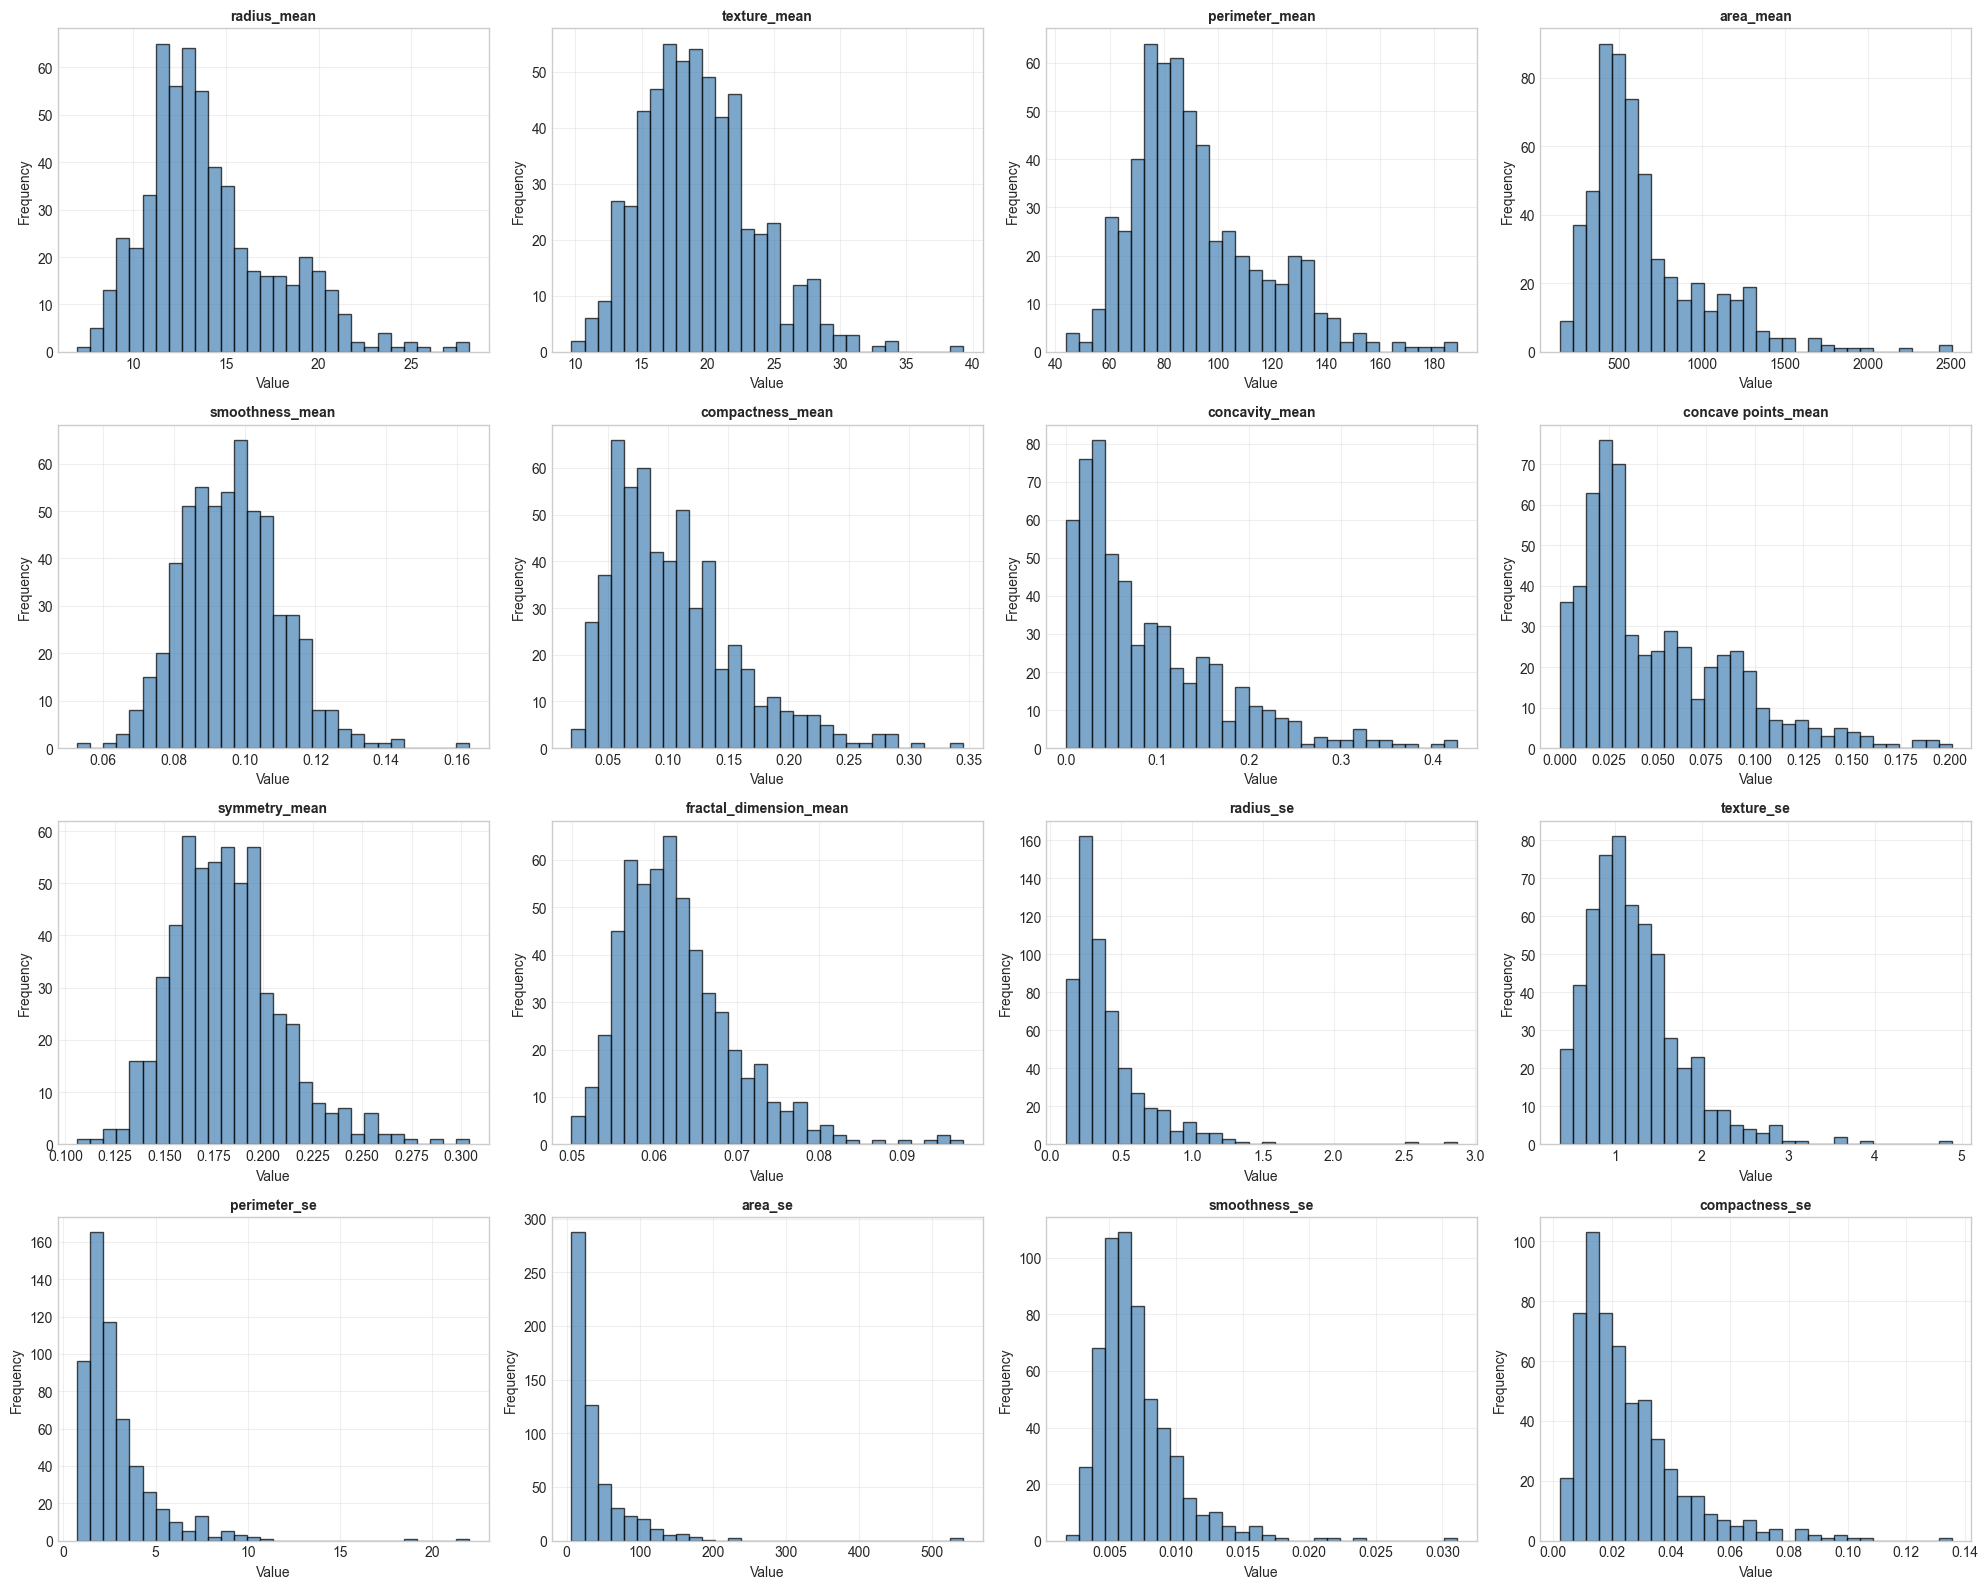

In [15]:
# Plot distributions of first 16 features
n_features = min(16, len(feature_cols))
fig, axes = plt.subplots(4, 4, figsize=(20, 16))
axes = axes.flatten()

for idx, feature in enumerate(feature_cols[:n_features]):
    axes[idx].hist(data[feature], bins=30, color='steelblue', edgecolor='black', alpha=0.7)
    axes[idx].set_title(feature, fontsize=10, fontweight='bold')
    axes[idx].set_xlabel('Value')
    axes[idx].set_ylabel('Frequency')
    axes[idx].grid(alpha=0.3)

plt.tight_layout()
plt.show()

#### 6. Correlation Analysis

In [17]:
# Calculate correlation matrix
numeric_features = data[feature_cols].select_dtypes(include=[np.number])
correlation_matrix = numeric_features.corr()

print(f"Correlation matrix shape: {correlation_matrix.shape}")

Correlation matrix shape: (30, 30)


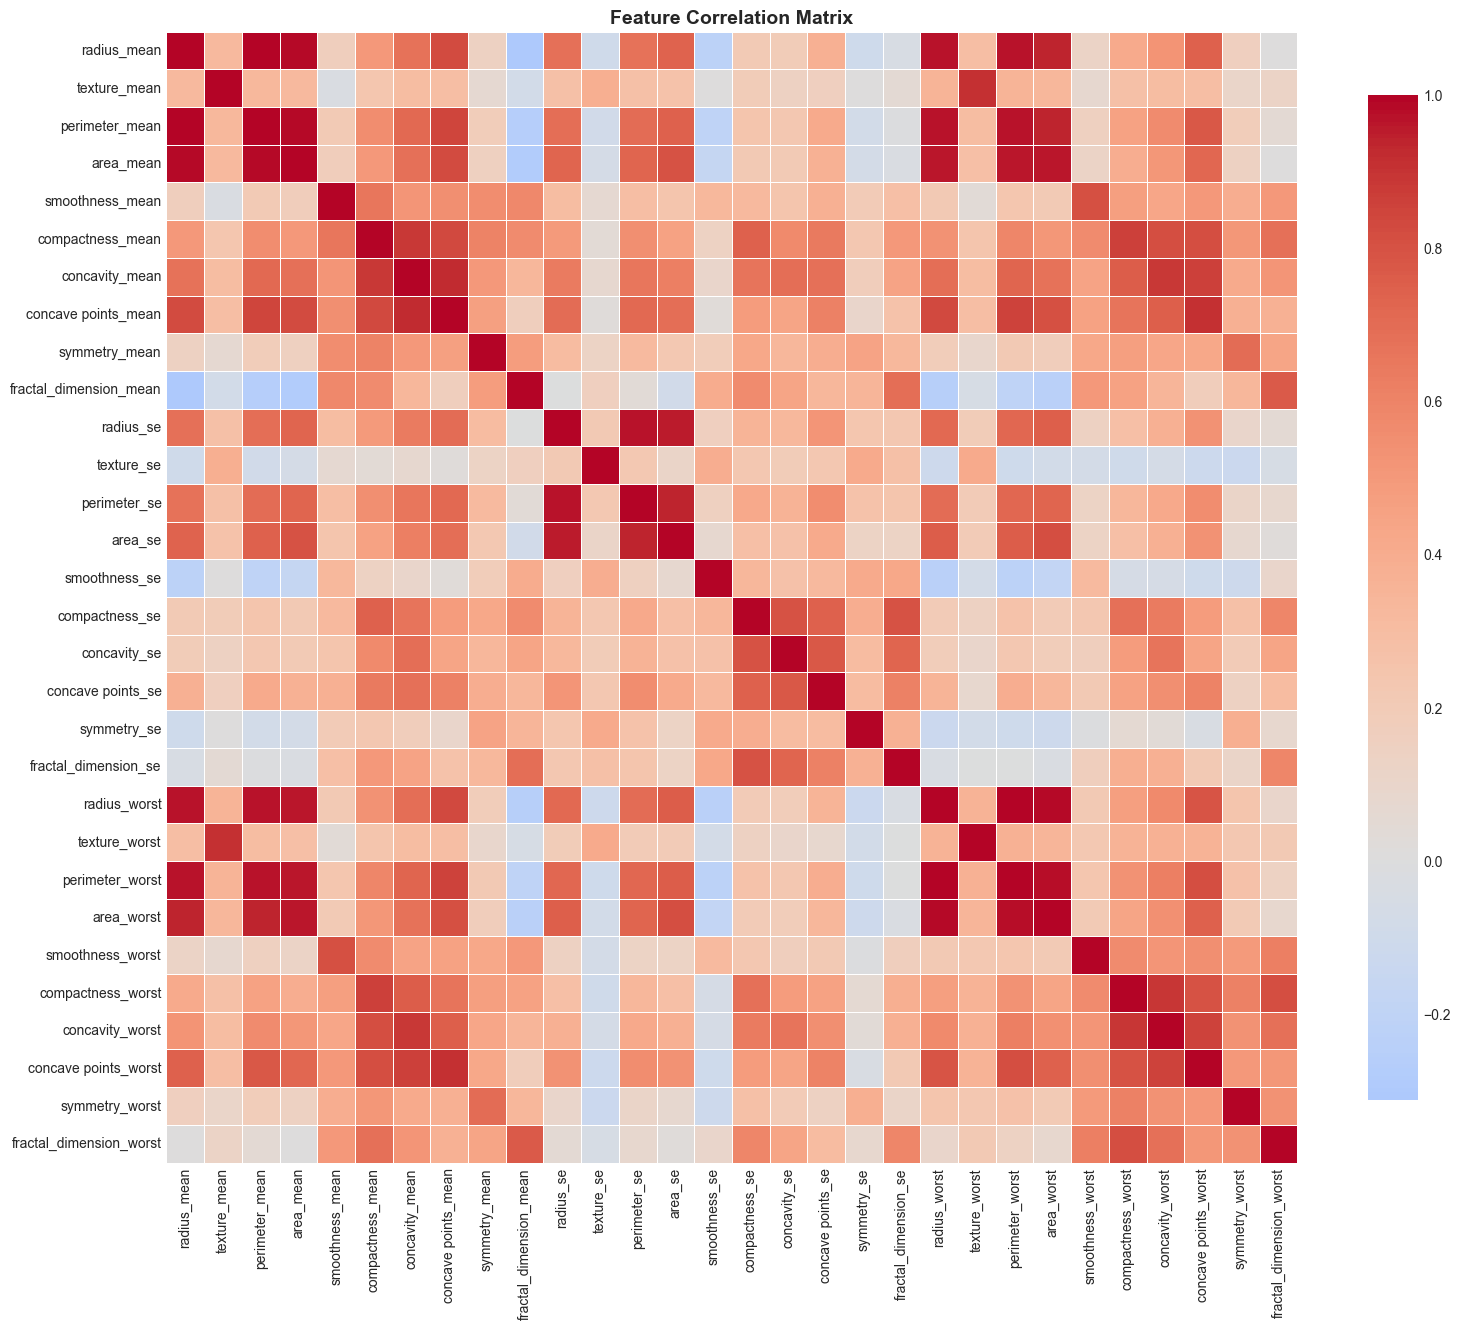

In [18]:
# Visualize correlation matrix
plt.figure(figsize=(16, 14))

if len(correlation_matrix) <= 30:
    sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', center=0, 
                square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})
    plt.title('Feature Correlation Matrix', fontsize=14, fontweight='bold')
else:
    # Show top 30 features
    sns.heatmap(correlation_matrix.iloc[:30, :30], annot=False, cmap='coolwarm', 
                center=0, square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})
    plt.title('Feature Correlation Matrix (Top 30)', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

In [19]:
# Find highly correlated pairs
high_corr_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > 0.8:
            high_corr_pairs.append({
                'Feature1': correlation_matrix.columns[i],
                'Feature2': correlation_matrix.columns[j],
                'Correlation': correlation_matrix.iloc[i, j]
            })

if high_corr_pairs:
    high_corr_df = pd.DataFrame(high_corr_pairs).sort_values('Correlation', key=abs, ascending=False)
    print(f"Found {len(high_corr_pairs)} highly correlated pairs (|r| > 0.8):")
    print(high_corr_df)
else:
    print("No highly correlated pairs found (|r| > 0.8)")

Found 44 highly correlated pairs (|r| > 0.8):
               Feature1                 Feature2  Correlation
0           radius_mean           perimeter_mean     0.997855
36         radius_worst          perimeter_worst     0.993708
1           radius_mean                area_mean     0.987357
7        perimeter_mean                area_mean     0.986507
37         radius_worst               area_worst     0.984015
38      perimeter_worst               area_worst     0.977578
30            radius_se             perimeter_se     0.972794
10       perimeter_mean          perimeter_worst     0.970387
3           radius_mean             radius_worst     0.969539
9        perimeter_mean             radius_worst     0.969476
4           radius_mean          perimeter_worst     0.965137
14            area_mean             radius_worst     0.962746
16            area_mean               area_worst     0.959213
15            area_mean          perimeter_worst     0.959120
31            radius_se 

#### 7. Summary Statistics

In [21]:
print("EDA Summary")
print(f"\nTotal Samples: {len(data):,}")
print(f"Total Features: {len(feature_cols)}")
print(f"Target Column: {target_col}")
print(f"\nTarget Distribution:")
for val, count in data[target_col].value_counts().items():
    print(f"  {val}: {count} ({count/len(data)*100:.2f}%)")

if 'dataset' in data.columns:
    print(f"\nDataset Split:")
    for val, count in data['dataset'].value_counts().items():
        print(f"  {val}: {count} ({count/len(data)*100:.2f}%)")

EDA Summary

Total Samples: 569
Total Features: 30
Target Column: diagnosis

Target Distribution:
  0: 357 (62.74%)
  1: 212 (37.26%)

Dataset Split:
  train: 455 (79.96%)
  test: 114 (20.04%)
